# 1. Импорт базовых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Иморт файла с данными

In [2]:
# импорт файла
file_path = r'E:\Портфолио\Анализ данных о розничной торговли\sales_data_sample.csv'
df = pd.read_csv(file_path, encoding='latin1')

# переименование колонок
df.columns = ["Номер заказа", "Количество заказанных", "Цена за единицу",
              "Номер строки заказа", "Продажи", "Дата заказа", "Статус",
              "Квартал", "Месяц", "Год", "Линия продукта", 
              "Рекомендуемая розничная цена производителя", 
              "Код продукта", "Название клиента", "Телефон", 
              "Адресная строка 1", "Адресная строка 2", "Город",
              "Штат", "Почтовый индекс", "Страна", "Территория", 
              "Фамилия контактного лица", "Имя контактного лица", 
              "Размер сделки"]
df.head()

,Номер заказа,Количество заказанных,Цена за единицу,Номер строки заказа,Продажи,Дата заказа,Статус,Квартал,Месяц,Год,...,Адресная строка 1,Адресная строка 2,Город,Штат,Почтовый индекс,Страна,Территория,Фамилия контактного лица,Имя контактного лица,Размер сделки
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# 3. Обработка пустых значений

## 3.1 Функция для поиска пустых значений

In [3]:
def null_search(df):
    null_value = df.isnull().sum()
    percent_null_value = round(null_value/len(df)* 100, 2)
    type_data = df.dtypes

    data = {'Пустые значения': null_value, '% Пустых значений': percent_null_value,
            'Тип данных': type_data}

    df_info = pd.DataFrame(data)
    result = df_info[df_info['Пустые значения'] != 0].sort_values(by='Пустые значения', ascending=False)
    return result

## 3.2 Функция для вывода диаграммы и пустых значений в df

In [4]:
def chart():
    
    # создание df с информацией о пустых значениях
    info = null_search(df)
    
    sns.set(style='darkgrid')
    sns.barplot(data=info, x=info.index, y='% Пустых значений', color='b')

    plt.title('Столбчатая диаграмма пустых значений в колонках')
    plt.ylabel('% Пустых значений')
    plt.xlabel('Колонки')

    plt.xticks(rotation=90)
    plt.show()
    
    return info

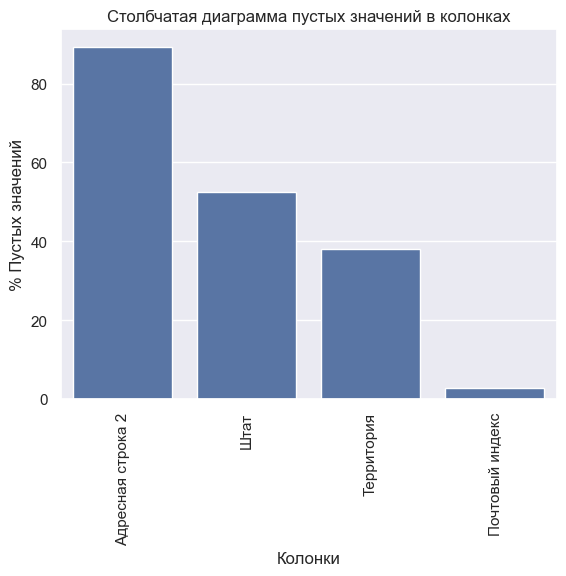

,Пустые значения,% Пустых значений,Тип данных
Адресная строка 2,2521,89.30,object
Штат,1486,52.64,object
Территория,1074,38.04,object
Почтовый индекс,76,2.69,object


In [5]:
chart()

## 3.3 Обработка колонок "Адресная строка 2" и "Штат"

In [6]:
# удаление колонки "Адресная строка 2"
df = df.drop('Адресная строка 2', axis=1)

In [7]:
# выбираеv строки в DF, где значение в столбце "Штат" равно пустому (NaN),
# а затем извлекаем уникальные значения из столбца "Город" для этих отфильтрованных строк
df[df['Штат'].isnull()]['Город'].unique()

array(['Reims', 'Paris', 'Lille', 'Bergen', 'Nantes', 'Helsinki',
       'Stavern', 'Salzburg', 'Liverpool', 'Madrid', 'Lule', 'Singapore',
       'Lyon', 'Torino', 'Boras', 'Versailles', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'Bruxelles', 'Oulu', 'Graz',
       'Makati City', 'Marseille', 'Koln', 'Gensve', 'Reggio Emilia',
       'Frankfurt', 'Espoo', 'Dublin', 'Manchester', 'Aaarhus', 'Sevilla',
       'Strasbourg', 'Oslo', 'Bergamo', 'Munich', 'Charleroi'],
      dtype=object)

In [8]:
# учитывая, что некоторые города не имеют штатов, то их можно заменить на None
df['Штат'] = df['Штат'].fillna('None')

## 3.4 Обработка колонки "Территория"

In [9]:
# уникальные значения в столбце "Территория"
df['Территория'].unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [10]:
# поиск стран, у которых колонка "Территория" = Nan
df[df['Территория'].isnull()]['Страна'].unique()

array(['USA', 'Canada'], dtype=object)

In [11]:
# заменяем пустые значения в столбце "Территория" строками 'NA' ( North America )
df['Территория'] = df['Территория'].fillna('NA')

## 3.5 Обработка колонки "Почтовый индекс"

In [12]:
data = df[df['Почтовый индекс'].isnull()][['Город', 'Страна' ,'Штат']]
data.head()

,Город,Страна,Штат
4,San Francisco,USA,CA
8,San Francisco,USA,CA
46,San Francisco,USA,CA
50,San Francisco,USA,CA
58,San Francisco,USA,CA


In [13]:
columns = data.columns

for col in columns:
    un = data[col].unique()
    print(f'Уникальные значения в колонке "{col}": {un}')

Уникальные значения в колонке "Город": ['San Francisco' 'Los Angeles']
Уникальные значения в колонке "Страна": ['USA']
Уникальные значения в колонке "Штат": ['CA']


### Среди всех пустых значений в столбце "Почтовый индекс" присутствуют только два города с отсутствующими данными. В такой ситуации, возможно заменить значения "NaN" на наиболее часто встречающиеся индексы для этих городов.

In [14]:
# наиболее часто встречающиеся индексы
postal_codes = {
    'San Francisco': '94102',
    'Los Angeles': '90001'
}

# Заполнение пустых значений
for city, postal_code in postal_codes.items():
    df.loc[(df['Город'] == city) & (df['Почтовый индекс'].isnull()), 'Почтовый индекс'] = postal_code


In [15]:
null_search(df)

,Пустые значения,% Пустых значений,Тип данных


### отлично, все пустые значения были обработаны

In [16]:
df.columns

Index(['Номер заказа', 'Количество заказанных', 'Цена за единицу',
       'Номер строки заказа', 'Продажи', 'Дата заказа', 'Статус', 'Квартал',
       'Месяц', 'Год', 'Линия продукта',
       'Рекомендуемая розничная цена производителя', 'Код продукта',
       'Название клиента', 'Телефон', 'Адресная строка 1', 'Город', 'Штат',
       'Почтовый индекс', 'Страна', 'Территория', 'Фамилия контактного лица',
       'Имя контактного лица', 'Размер сделки'],
      dtype='object')

# 4. Визуализация графиков

## 4.1 Анализ распределения продаж по кварталам

In [17]:
# Группировка данных по кварталам и суммирование продаж
data = df.groupby('Квартал')['Продажи'].sum()
data

Квартал
1    2350817.73
2    2048120.30
3    1758910.81
4    3874780.01
Name: Продажи, dtype: float64

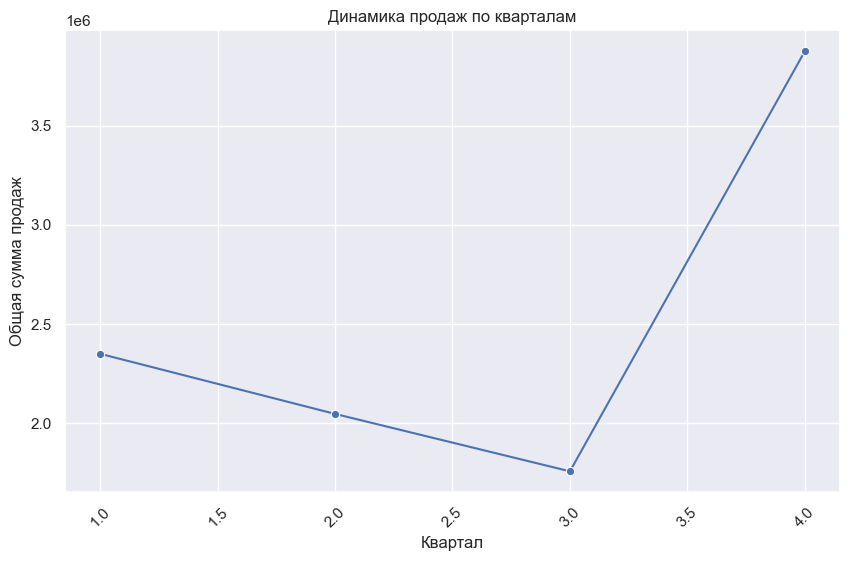

In [18]:
# построение графика
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')

sns.lineplot(data=data, marker='o', color='b')

plt.title('Динамика продаж по кварталам')
plt.ylabel('Общая сумма продаж')
plt.xlabel('Квартал')

plt.xticks(rotation=45)
plt.show()


### Сезонные тенденции: Видно, что общая сумма продаж имеет тенденцию к снижению во 2 и 3 кварталах, а затем резко возрастает в 4 квартале. Это может указывать на сезонность, связанную с праздниками и покупательскими активностями, характерными для конца года, таких как Рождество, Новый год, черная пятница и т. д.


### Тренды: Основной тренд, вероятно, связан с общим ростом продаж с течением времени. Видно, что продажи в целом растут с 1 квартала до 4 квартала. Это может быть связано с общим экономическим ростом, увеличением клиентской базы, расширением ассортимента товаров и т. д.

## 4.2 Корреляция между количеством заказанных и общими продажами

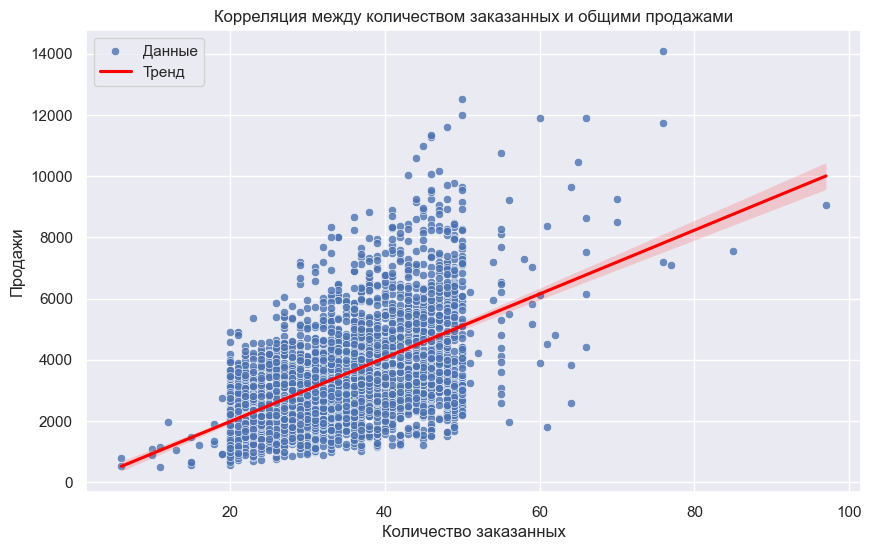

In [19]:
# построение графика
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')

sns.scatterplot(data=df, x='Количество заказанных', 
                y='Продажи', label='Данные', alpha=0.8)

sns.regplot(data=df, x='Количество заказанных', y='Продажи', 
               scatter=False, color='red', label='Тренд')

plt.title('Корреляция между количеством заказанных и общими продажами')
plt.ylabel('Продажи')
plt.xlabel('Количество заказанных')

plt.legend(loc='upper left')
plt.show()


### По графику видно, что есть положительная корреляция между количеством заказанных товаров и общими продажами. С увеличением количества заказов продажи также растут.

## 4.3 Распределение сделок по годам

In [20]:
# поиск уникальных значений в колонке "Размер сделки"
df['Размер сделки'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [21]:
# кодирование значений в колонке "Размер сделки"
dictionary = {'Small': 1, 'Medium': 2, 'Large':3}
df['Размер сделки код'] = df['Размер сделки'].map(dictionary)
df['Размер сделки код'].unique()

array([1, 2, 3], dtype=int64)

In [22]:
data = df.groupby('Год')['Размер сделки код'].sum()
data

Год
2003    1610
2004    2119
2005     792
Name: Размер сделки код, dtype: int64

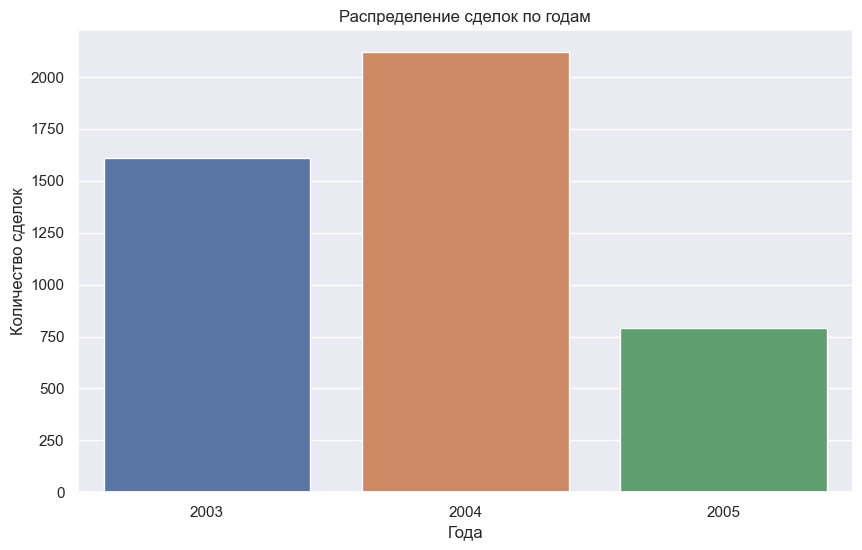

In [23]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')

sns.barplot(x=data.index, y=data.values)

plt.title('Распределение сделок по годам')
plt.ylabel('Количество сделок')
plt.xlabel('Года')

plt.show()

## 4.4 Анализ количества сделок по линиям продуктов

In [24]:
data = df.groupby('Линия продукта')['Продажи'].sum()
data

Линия продукта
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: Продажи, dtype: float64

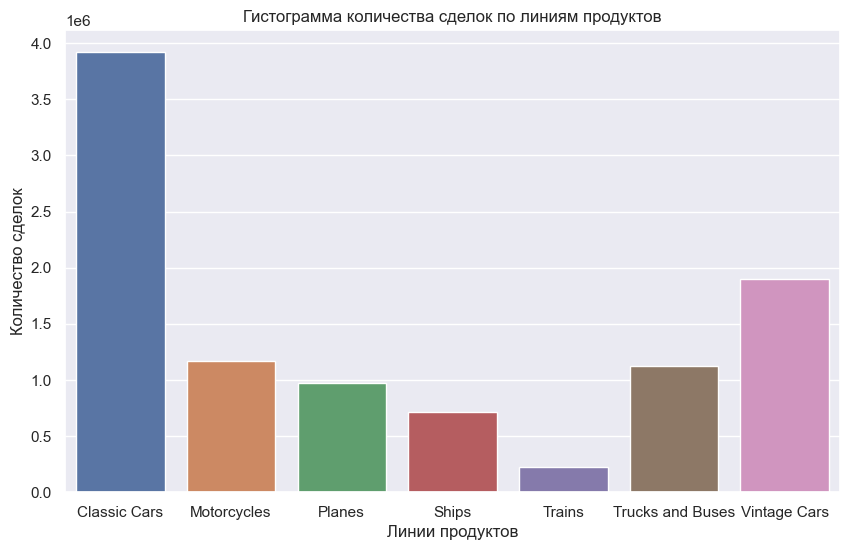

In [25]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')

sns.barplot(x=data.index, y=data.values)

plt.title('Гистограмма количества сделок по линиям продуктов')
plt.ylabel('Количество сделок')
plt.xlabel('Линии продуктов')

plt.show()

## 4.5 Динамика среднего чека по месяцам

In [26]:
# преобразование колонки с датой в тип данных "datetime64[ns]"
df['Дата заказа'] = pd.to_datetime(df['Дата заказа'])

In [27]:
# добавление столбца с месяцами
df['Месяц'] = df['Дата заказа'].dt.month

In [28]:
# Группировка данных по месяцам и расчет среднего чека
data = df.groupby('Месяц')['Продажи'].mean()
data

Месяц
1     3431.766114
2     3618.044196
3     3558.968821
4     3760.623371
5     3666.557778
6     3471.425802
7     3651.602624
8     3451.887801
9     3419.440175
10    3536.956530
11    3549.222228
12    3525.995111
Name: Продажи, dtype: float64

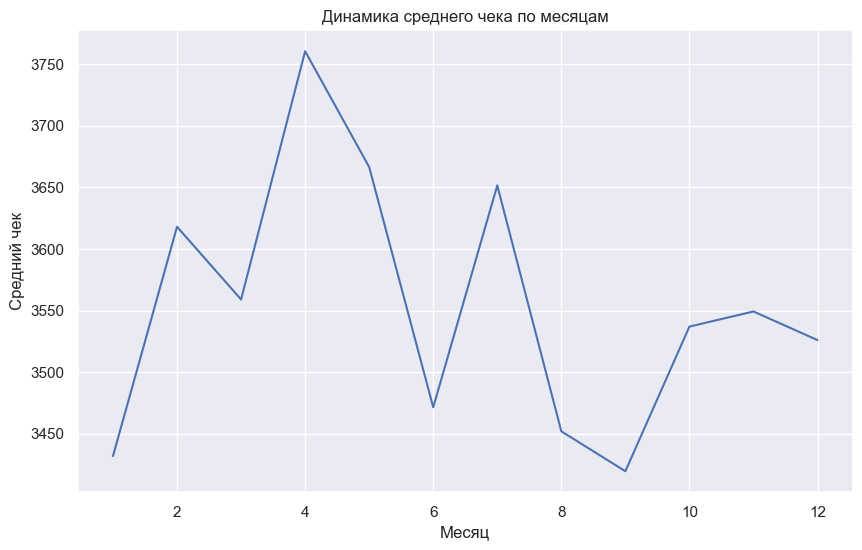

In [29]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')

sns.lineplot(x=data.index, y=data.values)

plt.title('Динамика среднего чека по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')

plt.show()

# 5. Работа с данными

## 5.1 Найти клиента, который сделал наибольший заказ по сумме

In [30]:
# создание колонки с именем и фамилией
df['Имя и фамилия'] = df['Имя контактного лица'] + ' ' + df['Фамилия контактного лица']

In [31]:
#max_order_client = df.groupby('Имя и фамилия')['Размер сделки код'].sum().idxmax()
max_order_client = df.groupby('Имя и фамилия')['Размер сделки код'].sum().idxmax()
max_order_amount = df.groupby('Имя и фамилия')['Размер сделки код'].sum().max()

print(f"Клиент с наибольшим заказом по сумме: {max_order_client}, сумма заказа: {max_order_amount}")

Клиент с наибольшим заказом по сумме: Diego Freyre, сумма заказа: 412


## 5.2 Топ-5 клиентов с наибольшим количеством заказов

In [32]:
result = df['Имя и фамилия'].value_counts()
name = result.head()
print(f'5 клиентов с наибольшим количеством заказов:')
print('')
print(name)

5 клиентов с наибольшим количеством заказов:

Имя и фамилия
Diego Freyre         259
Valarie Nelson       180
Peter Ferguson        55
Janine Labrune        53
Victoria Ashworth     51
Name: count, dtype: int64


## 5.3 Рассчитать общее количество продаж по месяцам для каждой линии продукта

In [33]:
data = df.groupby(['Месяц', 'Линия продукта'])['Продажи'].sum()
data

Месяц  Линия продукта  
1      Classic Cars        303070.56
       Motorcycles          81113.88
       Planes               46715.81
       Ships                61287.40
       Trains               19026.58
                             ...    
12     Planes               68497.74
       Ships                24079.94
       Trains               23181.14
       Trucks and Buses    104133.74
       Vintage Cars        131216.63
Name: Продажи, Length: 84, dtype: float64

In [34]:
ind_nums = np.arange(1, 13)
ind_product = df['Линия продукта'].unique()

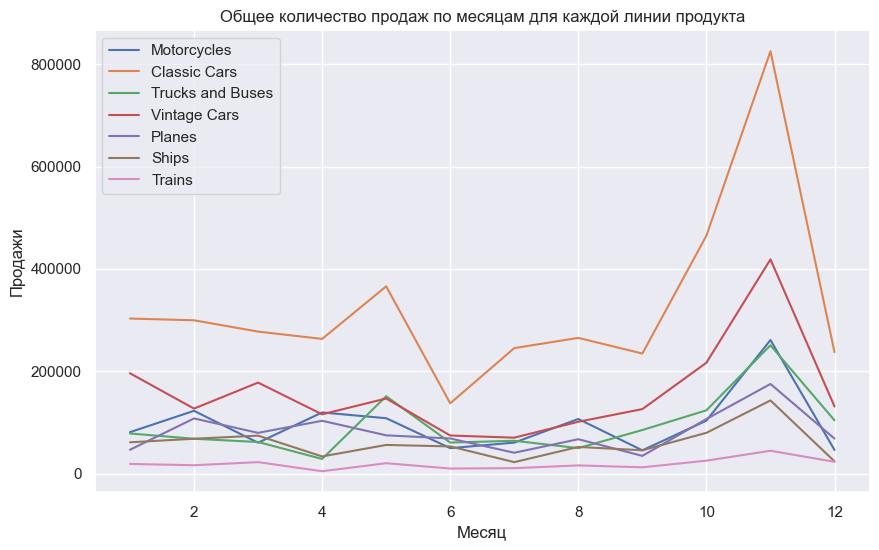

In [36]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')

for product in ind_product:
    sns.lineplot(x=ind_nums, y=data.loc[ind_nums, product], label=product)

plt.title('Общее количество продаж по месяцам для каждой линии продукта')
plt.xlabel('Месяц')
plt.ylabel('Продажи')

plt.legend(loc='upper left')
plt.show()